In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
cnx = create_engine('sqlite:///db_bello_customers.db').connect()
payments_df = pd.read_sql_table("Payments", cnx)
print(payments_df.shape)
payments_df.head()

(100, 6)


,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [3]:
sales_df = pd.read_excel("lcl_bello_sales.xlsx")
print(sales_df.shape)
sales_df.head()

(100, 2)


,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [4]:
cld_data = pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')
print(cld_data.shape)
cld_data.head()

(100, 5)


,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


In [5]:
data = pd.concat([payments_df, sales_df, cld_data],axis=1)

In [6]:
data = data.iloc[:,np.unique(data.columns, return_index=True)[1]]

In [8]:
print(data.shape)
data.head()

(100, 10)


,CustomerID,Date,Gender,PaymentMode,Price,ProductType,Rating,ShippingMode,ShippingTime,Total_Ratings
0,10471,16/08/20,Female,Creditcard,₹ 675036.2138626401,coates,1 start,Economy,17.0,8736
1,10472,2/8/2020 0:00,Unspecified,Ewallet,"€ 2,315.53",dresses,2 star,Mail,12.0,8547
2,10473,8/8/2020 0:00,None,Prepaid Card,₹ 611426.29122378,NaN,2 star,Mail,10.0,9833
3,10474,None,Female,Directdeposit,₹ 210869.48083470002,dresses,2star,Normal,2133.0,7591
4,10475,24/08/20,Male,None,₹ 679422.2811434,pantas,1 start,Economy,2133.0,5131


In [7]:
data[data.duplicated()]

,CustomerID,Date,Gender,PaymentMode,Price,ProductType,Rating,ShippingMode,ShippingTime,Total_Ratings
88,10558,31/08/20,Unspecified,Credit Card,₹ 234895.78095268,coates,5 star,Normal,11.0,7007
89,10558,31/08/20,Unspecified,Credit Card,₹ 234895.78095268,coates,5 star,Normal,11.0,7007


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data[data['CustomerID']==10558]

,CustomerID,Date,Gender,PaymentMode,Price,ProductType,Rating,ShippingMode,ShippingTime,Total_Ratings
87,10558,31/08/20,Unspecified,Credit Card,₹ 234895.78095268,coates,5 star,Normal,11.0,7007


In [12]:
data=data[['Date','CustomerID','ProductType','Rating','Total_Ratings', 'Gender','PaymentMode', 'ShippingMode', 'ShippingTime', 'Price']]
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,None,Prepaid Card,Mail,10.0,₹ 611426.29122378
3,None,10474,dresses,2star,7591,Female,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,None,Economy,2133.0,₹ 679422.2811434


In [11]:
#outliers
shipping_time_mean = data.ShippingTime.mean()
shipping_time_median = data.ShippingTime.median()
shipping_time_mean, shipping_time_median

(114.10309278350516, 13.0)

In [13]:
data.boxplot(column='ShippingTime')

In [15]:
q1 = data.ShippingTime.quantile(0.25)
q3 = data.ShippingTime.quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
higher = q3 + 1.5*IQR
lower, higher

(-4.5, 31.5)

In [16]:
cleaned_data = data[(data['ShippingTime']>= lower) & (data['ShippingTime'] <= higher)]

In [17]:
cleaned_data.shape

(90, 10)

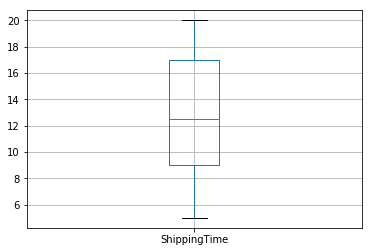

In [18]:
cleaned_data.boxplot(column='ShippingTime')

In [19]:
shipping_time_mean = cleaned_data.ShippingTime.mean()
shipping_time_median = cleaned_data.ShippingTime.median()
shipping_time_mean, shipping_time_median

(12.822222222222223, 12.5)

In [20]:
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,None,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,NaN
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [21]:
cleaned_data.Gender.fillna('Unspecified', inplace=True)
cleaned_data.ProductType.fillna(cleaned_data.ProductType.mode()[0], inplace=True)
cleaned_data.PaymentMode.fillna(cleaned_data.PaymentMode.mode()[0], inplace=True)
cleaned_data.Rating.fillna(cleaned_data.Rating.mode()[0], inplace=True)
cleaned_data.ShippingMode.fillna(cleaned_data.ShippingMode.mode()[0], inplace=True)
cleaned_data.ShippingTime.fillna(cleaned_data.ShippingTime.mean(), inplace=True)

c:\python36_64\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
cleaned_data.Price.fillna(0,inplace=True)

c:\python36_64\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 99
Data columns (total 10 columns):
Date             90 non-null object
CustomerID       90 non-null int64
ProductType      90 non-null object
Rating           90 non-null object
Total_Ratings    90 non-null int64
Gender           90 non-null object
PaymentMode      90 non-null object
ShippingMode     90 non-null object
ShippingTime     90 non-null float64
Price            90 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 7.7+ KB


In [24]:
cleaned_data = cleaned_data.astype({'CustomerID': int,
                     'ProductType': str, 
                     'Rating': 'category', 
                     'Gender': 'category', 
                     'PaymentMode': 'category',
                    'ShippingMode': str,
                    'ShippingTime': int})

In [25]:
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12,"€ 2,315.53"
2,8/8/2020 0:00,10473,coates,2 star,9833,Unspecified,Prepaid Card,Mail,10,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20,0
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Mail,14,£ 6610.077565000001


In [26]:
cleaned_data.ProductType = cleaned_data.ProductType.apply(lambda a: a.replace('coates', 'Coats/Jackets')
                                                          .replace('pantas', 'Pants')
                                                         .replace('dresses ', 'Dresses'))
cleaned_data.Rating = cleaned_data.Rating.apply(lambda a: a.replace('1 start', '1 star').replace('2star', '2 star'))
cleaned_data.PaymentMode = cleaned_data.PaymentMode.apply(lambda a: a.replace('Creditcard', 'Credit Card').replace('Directdeposit', 'Direct Deposit'))

In [27]:
print(cleaned_data.ProductType.unique())
print(cleaned_data.Rating.unique())
print(cleaned_data.Gender.unique())
print(cleaned_data.PaymentMode.unique())
print(cleaned_data.ShippingMode.unique())

['Coats/Jackets' 'Dresses' 'Jeans' 'Pants' 'Cardigan' 'Shirts/Tops' 'Hats']
['1 star' '2 star' '5 star' '4 star' '3 star']
[Female, Unspecified, Male]
Categories (3, object): [Female, Unspecified, Male]
['Credit Card' 'Ewallet' 'Prepaid Card' 'Direct Deposit' 'Mobile Payment'
 'Cash' 'Mobile']
['Economy' 'Mail' 'Express' 'Normal']


In [28]:
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,₹ 675036.2138626401
1,2/8/2020 0:00,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,"€ 2,315.53"
2,8/8/2020 0:00,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20,0
6,8/8/2020 0:00,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,£ 6610.077565000001


In [29]:
cleaned_data.Date = pd.to_datetime(cleaned_data.Date, dayfirst=True)
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20,0
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,£ 6610.077565000001


In [30]:
cleaned_data.dtypes

Date             datetime64[ns]
CustomerID                int32
ProductType              object
Rating                   object
Total_Ratings             int64
Gender                 category
PaymentMode              object
ShippingMode             object
ShippingTime              int32
Price                    object
dtype: object

In [31]:
#Avg shipping time for each product type
cleaned_data.groupby('ProductType').ShippingTime.agg([np.mean, np.median, min, max])

,mean,median,min,max
ProductType,,,,
Cardigan,11.333333,12.0,6,16
Coats/Jackets,12.653846,12.0,5,20
Dresses,13.473684,13.0,5,20
Hats,13.000000,14.0,7,20
Jeans,11.200000,10.0,5,18
Pants,14.636364,17.0,9,20
Shirts/Tops,12.500000,12.5,5,20


In [32]:
grouped = cleaned_data.groupby('Gender')
grouped

In [33]:
grouped.get_group('Male').head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
13,2020-08-02,10484,Coats/Jackets,1 star,5024,Male,Mobile Payment,Express,18,"$3,148.65"
15,2020-08-06,10486,Coats/Jackets,1 star,6701,Male,Direct Deposit,Mail,19,£ 2190.66134375
23,2020-08-03,10494,Dresses,2 star,5668,Male,Credit Card,Mail,20,₹ 596893.42988816
25,2020-08-08,10496,Hats,4 star,6594,Male,Prepaid Card,Express,20,£ 4564.22450475
26,2020-08-06,10497,Dresses,1 star,7605,Male,Direct Deposit,Express,11,"€ 5,813.36"


In [34]:
#Avg shipping time for each shipping mode
cleaned_data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.median, min, max])

,mean,median,min,max
ShippingMode,,,,
Economy,15.176471,17.0,8,20
Express,12.285714,11.0,5,20
Mail,12.857143,12.0,5,20
Normal,11.583333,11.5,5,18


In [36]:
cleaned_data.to_csv("..\DataManipulation\BelloFashions.csv")